In [ ]:
# Problem Statement: Consider the dataset “zoo.data” and look at the info in the first five rows. The first column denotes 
# the animal name and the last one specifies a high-level class for the corresponding animal. Find a solution to the 
# following questions:
# Unique number of high-level class
# Perform agglomerative clustering using the 16 intermediate features [ Hint: Refer to the agglomerative clustering 
# (Hierarchical Clustering) module in Scikitlearn and set the number of clusters appropriately ]
# Refer the below link for further documentation:
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# Compute the mean squared error by comparing the actual class and predicted high-level class.
# Objective: Perform agglomerative clustering with appropriate MSE value.

In [1]:
import pandas as pd
data=pd.read_csv("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Demo Datasets for pdf/Lesson 7/zoo.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 2 3 4 5 6 7]


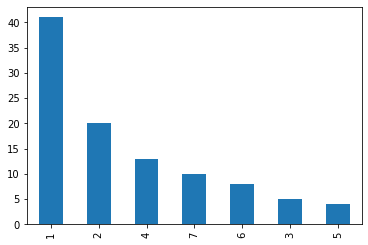

In [5]:
import numpy as np
labels=data['class_type']
print(np.unique(labels.values))

from matplotlib import pyplot as plt
%matplotlib inline
fig,ax=plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')
# we have 7 unique class labels. we r grouping animals based on their features.

In [6]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
features=data.values[:,1:-1]
features.shape

(101, 16)

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
model=AgglomerativeClustering(n_clusters=7,linkage="average",affinity="cosine") # 7 coz there r 7 unique class labels
model.fit(features)
print(model.get_params())

{'affinity': 'cosine', 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'average', 'memory': None, 'n_clusters': 7}


In [9]:
model.labels_
# labels predicted by model against the features

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [11]:
print(np.unique(model.labels_))
# we can see that we have predicted labels against all our 101 animals. Just to match with predicted numbers will subtract with 1
labels=labels-1

[0 1 2 3 4 5 6]


In [12]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(labels,model.labels_)
abs_error=np.sqrt(score)
print(abs_error)
# value is acceptable

2.4373333911071624


In [ ]:
# recap
# 1> import libraries and the dataset
# 2> check for missing values
# 3> identify unique labels and plot them
# 4> Extract features necessary for clustering within a single variable
# 5> fit agglomorative clustering model on the feature data.
# 6> predict labels for each animal
# 7> print the RMSE of the model

In [ ]:
# Problem Statement: An ecommerce company has prepared a rough dataset containing shopping details of their customers, 
# which includes CustomerID, Genre, Age, Annual Income (k$), SpendingScore (1-100). The company is unable to target a 
# specific set of customers with a particular set of SKUs.
# Objective: Segmentcustomers into different groups based on their shopping trends.

In [15]:
# step 1: import data
import pandas as pd
import numpy as np
customer_data= pd.read_csv('C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Day 5/shopping_data.csv')
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
# Step 2: Filter Columns
# Discard all the data, except annual income (in thousands of dollars) and spending score (1-100)

data = customer_data.iloc[:,3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

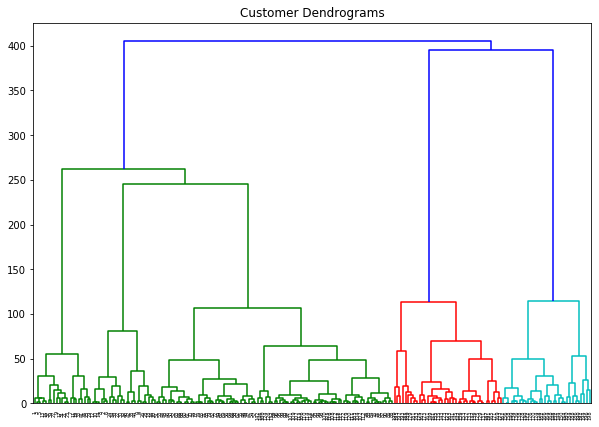

In [19]:
# Step 3: Create Dendrograms

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Customer Dendrograms')
dend= shc.dendrogram(shc.linkage(data,method='ward'))
# 5 clusters(3 green long lines n 2 blue long lines under 5 clusters)

In [20]:
# Step 4: Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
# Since there are five clusters, group the data points into these five clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

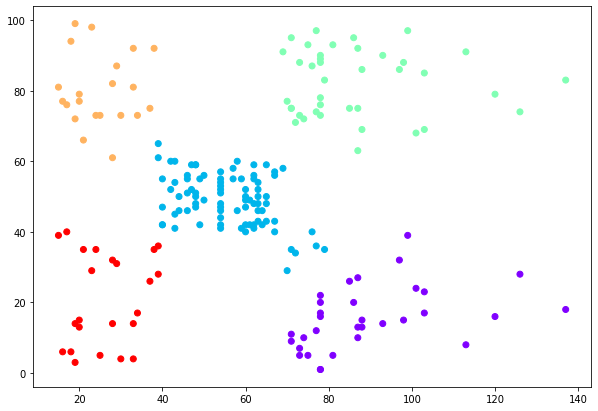

In [21]:
# Step 4: Plotting the Clusters

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
# Cluster based incentivization
# Problem Statement: Lithionpoweris the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a 
# rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery 
# from the company.
# Lithionpowerhas a variable pricing model based on driver's driving history. Battery life depends on factors such as over 
# speeding, distance driven per day, etc.
# Objective:
# Create a cluster model where drivers can be grouped together based on the driving data.
# Group the datapoints so that drivers will be incentivized based on the cluster.

In [22]:
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,6)# for handling default matplotlib values
df=pd.read_csv("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Demo Datasets for pdf/Lesson 7/driver-data.csv")
df.head()
# we will take only 2 columns for the sake of simplicity

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [24]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [25]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
df_analyze=df.drop('id',axis=1)
kmeans.fit(df_analyze)
print(kmeans.get_params())

{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [26]:
kmeans.cluster_centers_
# to determine the cluster center vectors

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [28]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [29]:
# let's check how many unique drivers r there in 1st and 2nd cluster
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


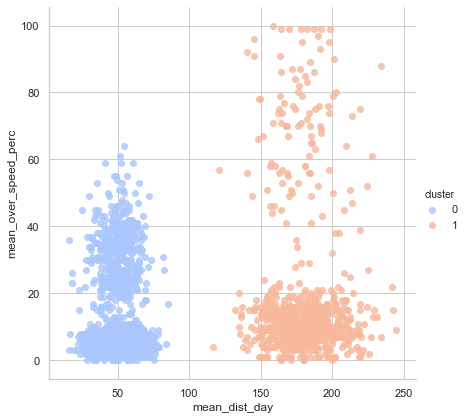

In [30]:
df_analyze['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)
# 1 cluster is centered around 50 mean_dist_delay and other around 175. Also there r more drivers in cluster whose 
# mean_dist_delay is centered around 175.

In [31]:
kmeans_4=KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
unique,counts=np.unique(kmeans_4.labels_,return_counts=True)
print(dict(zip(unique,counts)))
# we can clearly see difference in cluster centers. also we have distribution of data points in each cluster.Let's plot them.

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [ 50.40482436  32.36533958]
 [177.83509615  70.28846154]]
{0: 2773, 1: 696, 2: 427, 3: 104}


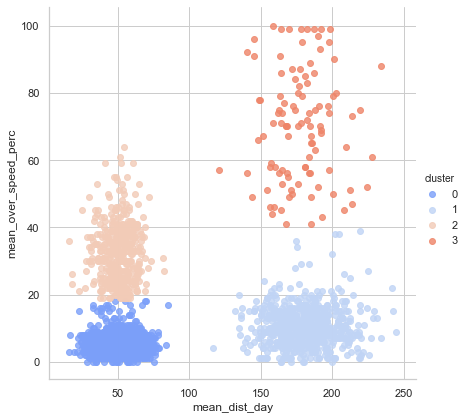

In [32]:
df_analyze['cluster']=kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [ ]:
# we can see that it is denser compare to the 2 cluster plot and hence more optimal.
# recap
# 1> import libraries and the dataset
# 2> fit k-means model on the dataset
# 3> evaluate cluster labels and centers
# 4> plot cluster to see distribution of data points
# 5> iterate the same by changing the number of clusters to 4
# 6> again evaluate cluster centers to see the distribution of data points
# 7> plot the cluster to see the distribution of data points
# 8> draw inference out of both plots.

In [ ]:
# Problem Statement: There is an image in the name of “tiger.png”. Use k-means clustering with k set to 16 and cluster the
# image, which means that you want to keep just 16 colors in our compressed image.
# Objective: Open and display the image “tiger.png”. Convert the image into numpyarray, so that it can be used in further 
# processing. Find out the dimensions of the image and convert it into a two-dimensional array (Use k-means clustering for 
# image segmentation, reducing the image into 16 colors).

In [34]:
# Step 1: Import Libraries

from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [37]:
# Step 2: Get the Image and its Corresponding RGB Values

img= Image.open('C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/tiger1.png')
img_np=np.asarray(img)
img_np[0:2]

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]]], dtype=uint8)

In [38]:
# Step 3: Get the Image Dimensions
img_np.shape
# For feeding this data into the algorithm, you must change the shape of this data into a dataset with 720*1280 = 921600 
# rows and 3 columns

(720, 1280, 3)

In [39]:
# Step 4: Reshape the Data

pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(921600, 3)

In [40]:
# Step 5: Define the K-means Model
model=KMeans(n_clusters=16)
model.fit(pixels)
print(model.get_params())
# After the model is trained, model.labels_ is used to obtain the number of cluster that is assigned to each data point or
# each pixel. model.cluster_centers_ gives us the coordinates or the RGB values of the 16 cluster centers.

{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 16, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [44]:
# Step 6: Define the Cluster Centres

pixel_centroids= model.labels_
cluster_centers=model.cluster_centers_
pixel_centroids


array([8, 8, 8, ..., 9, 9, 9])

In [45]:
cluster_centers

array([[211.95001468, 169.1774283 , 134.81030376],
       [ 69.74111805,  68.57165603,  57.89987991],
       [176.07466274, 176.68435467, 176.98451253],
       [137.24253301, 109.3639473 ,  84.48681136],
       [230.65543957, 229.58584025, 229.79032676],
       [ 52.56017509,  42.77155591,  36.86834859],
       [ 25.25101288,  19.51399845,  17.16361562],
       [ 93.43973345,  90.40893321,  81.201919  ],
       [153.49295963, 156.17487538, 154.46604732],
       [109.68630886, 110.30061659, 105.32642937],
       [203.24056017, 200.83384595, 199.44475165],
       [ 58.09155596, 124.71480217,  40.66875161],
       [107.59604369,  70.61302477,  44.41195041],
       [178.56745527, 131.70534406, 107.62269725],
       [ 98.09465545, 139.83320588,  85.20596482],
       [130.6981416 , 134.82339929, 124.1157475 ]])

In [48]:
# Step 7: Cluster Assignment

final=np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(16):
    final[pixel_centroids==cluster_no]=cluster_centers[cluster_no]
final[0:5]

array([[153.49295963, 156.17487538, 154.46604732],
       [153.49295963, 156.17487538, 154.46604732],
       [153.49295963, 156.17487538, 154.46604732],
       [153.49295963, 156.17487538, 154.46604732],
       [153.49295963, 156.17487538, 154.46604732]])

In [49]:
# Step 8: Reshape to Original Dimensions

comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(720, 1280, 3)

In [52]:
# Step 9: Convert the Pixel Values to Image

comp_image=Image.fromarray(np.uint8(comp_image))
comp_image.save('tiger_compressed.png')
img_1 = mpimg.imread('C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/tiger1.png')
img_2 = mpimg.imread('tiger_compressed.png')

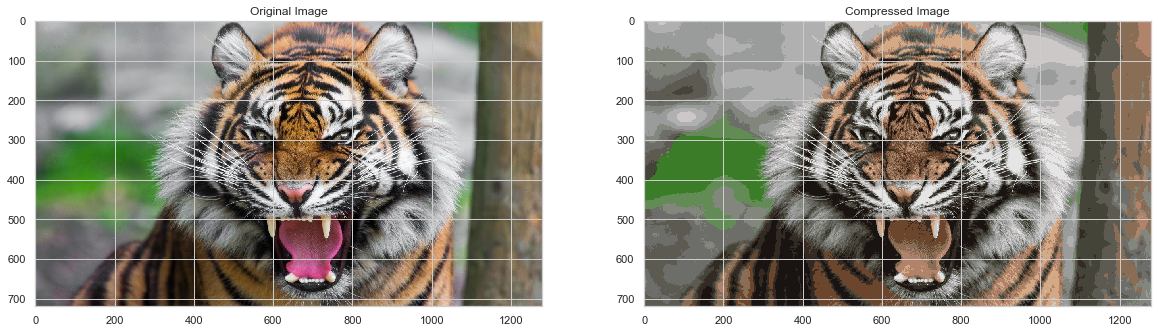

In [53]:
# Step 10: Original Plot vs. Compressed Image

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show()